# Intro a Pandas

Pandas es una librería de Python que nos permite trabajar con datos tabulares de manera muy eficiente. 

En el mundo del análisis de datos, Pandas se ha convertido en una herramienta fundamental para científicos de datos, analistas y cualquier persona que trabaje con datos en Python. Con Pandas, puedes realizar operaciones como limpieza, manipulación, visualización y análisis de datos de manera eficiente.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1920px-Pandas_logo.svg.png)

## 1. Instalar Pandas

Para instalar Pandas, ejecuta el siguiente comando en tu terminal:

```bash
pip install pandas==<version>
```

In [2]:
import pandas as pd

## 2. Series y Dataframes

Pandas tiene dos estructuras de datos principales: Series y DataFrames.

- **Series**: es un array unidimensional. Es similar a una columna en una tabla de Excel.
- **DataFrame**: es una estructura de datos bidimensional con filas y columnas con etiquetas. Es similar a una tabla de Excel.

### 2.1 Series

Para crear una Serie, puedes pasar una lista de elementos y Pandas creará una Serie con índices numéricos.

In [3]:
serie = pd.Series([1, 2, 3, 4, 5])
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 2.2 DataFrames

Para crear un DataFrame, puedes pasar un diccionario de listas, donde cada clave es el nombre de la columna y cada valor es una lista de elementos.

In [4]:
data = {
    'name': ['María', 'Daniel', 'Marisa', 'David', 'Sabrina'],
    'age': [16, 7, 29, None, 33], 
    'city': ['Madrid', 'Madrid', 'Málaga', 'Málaga', 'Valladolid'],
    'height': [None, 1.20, 1.60, 2.01, 1.83]
}

df = pd.DataFrame(data)
df

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Aunque lo más normal es crear DataFrames a partir de archivos CSV, Excel, bases de datos, etc. En este caso, vamos a guardar el DataFrame en un archivo CSV y posteriormente lo leeremos.

In [5]:
CSV_PATH = 'data.csv'

df.to_csv(CSV_PATH, index=False)
df = pd.read_csv(CSV_PATH)
df

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


## 3. Basics de un Dataframe

Podemos visualizar los primeros/últimos registros de un DataFrame con los métodos `head()` y `tail()`, respectivamente.

In [6]:
df.head(2)

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.2


In [7]:
df.tail(2)

,name,age,city,height
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Los dataframes tienen una serie de atributos básicos: `.columns`, `.values`, `.shape`, `.dtypes`, etc. Algunos de ellos te recordarán a los atributos de un array de NumPy.

In [8]:
df.columns

Index(['name', 'age', 'city', 'height'], dtype='object')

In [9]:
df.values

array([['María', 16.0, 'Madrid', nan],
       ['Daniel', 7.0, 'Madrid', 1.2],
       ['Marisa', 29.0, 'Málaga', 1.6],
       ['David', nan, 'Málaga', 2.01],
       ['Sabrina', 33.0, 'Valladolid', 1.83]], dtype=object)

In [10]:
df.shape

(5, 4)

In [11]:
df.dtypes

name       object
age       float64
city       object
height    float64
dtype: object

## 4. Estadísticas básicas

Pandas nos permite obtener la información general de un Dataframe con el método `info()`.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     4 non-null      float64
 2   city    5 non-null      object 
 3   height  4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes




Pandas nos permite obtener estadísticas básicas de un DataFrame con el método `describe()`. Este método nos devuelve un resumen de las estadísticas descriptivas de las **columnas numéricas**.

In [13]:
df.describe()

,age,height
count,4.000000,4.000000
mean,21.250000,1.660000
std,11.954776,0.349571
min,7.000000,1.200000
25%,13.750000,1.500000
50%,22.500000,1.715000
75%,30.000000,1.875000
max,33.000000,2.010000


## 5. Indexación

Recordemos que el indexing consiste en seleccionar un subconjunto de datos de un DataFrame. Recordemos antes cómo era el dataframe original y veamos que Pandas nos permite indexar un DataFrame de diferentes maneras.

In [14]:
df

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83



**Por nombre de columna**: `df['column_name']`

In [15]:
df['name']

0      María
1     Daniel
2     Marisa
3      David
4    Sabrina
Name: name, dtype: object

**Por posición (índice) de la fila**: `df.iloc[0]`


In [16]:
df.iloc[0]

name       María
age         16.0
city      Madrid
height       NaN
Name: 0, dtype: object

**Por etiqueta de la fila**: `df.loc['row_label']`


In [17]:
df.loc[0]  # en este caso, como los indices son los mismos que las posiciones, `loc` es lo mismo que `iloc`

name       María
age         16.0
city      Madrid
height       NaN
Name: 0, dtype: object

**Por etiqueta de fila y columna**: `df.loc['row_label', 'column_name']`

In [18]:
df.loc[0, 'age']

16.0

**Por condición**: `df[df['column_name'] > 0]`


In [19]:
condition = df['age'] > 18
df[condition]  # así se filtran los datos

,name,age,city,height
2,Marisa,29.0,Málaga,1.60
4,Sabrina,33.0,Valladolid,1.83


**Por valores mínimos y máximos**: `df['column_name'].idxmin()` y `df['column_name'].idxmax()`

In [20]:
max_age_row_idx = df["age"].idxmax()
max_age_row = df.loc[max_age_row_idx]
max_age_row

name         Sabrina
age             33.0
city      Valladolid
height          1.83
Name: 4, dtype: object

In [21]:
max_age_row_idx = df["age"].idxmax()
max_age_row_idx

4

In [22]:
city_column = df['city']
city_column.value_counts()

city
Madrid        2
Málaga        2
Valladolid    1
Name: count, dtype: int64

In [23]:
#Devuelve lo mismo que lo anterior, pero es menos legible. Siempre hay que hacer el código legible. 
df['city'].value_counts()

city
Madrid        2
Málaga        2
Valladolid    1
Name: count, dtype: int64

## 6. Data Cleaning

El data cleaning es un paso fundamental en cualquier análisis de datos. Pandas nos permite realizar operaciones de limpieza de datos de manera muy eficiente. **Es muy común encontrarnos con valores nulos** en nuestros datasets. Pandas nos ofrece métodos para tratar estos valores nulos, como `dropna()`, `fillna()` y `isnull()`. Recordemos primero, el dataset original.

In [24]:
df

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Por ejemplo, para ver si hay valores nulos en un DataFrame, podemos usar los metodos `isnull()` ó `isna()`.

In [25]:
df.isnull()

,name,age,city,height
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False


Para **eliminar** las filas con valores nulos, podemos usar el método `dropna()`.

In [26]:
df.dropna()

,name,age,city,height
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
4,Sabrina,33.0,Valladolid,1.83


Para **rellenar** los valores nulos con un valor específico, podemos usar el método `fillna()`.

In [27]:
df.fillna("Nulo")  # rellena los valores nulos con 0

,name,age,city,height
0,María,16.0,Madrid,Nulo
1,Daniel,7.0,Madrid,1.2
2,Marisa,29.0,Málaga,1.6
3,David,Nulo,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Estos métodos son aplicables también a las Series (columnas de un DataFrame).

In [28]:
df['age'].fillna(10)

0    16.0
1     7.0
2    29.0
3    10.0
4    33.0
Name: age, dtype: float64

# Ejercicios

Toma el dataframe original y guárdalo como un CSV

In [29]:
CSV_PATH_2 = "data_2.csv"

df.to_csv(CSV_PATH_2, index=False)

Ahora lee el archivo CSV

In [30]:
df = pd.read_csv(CSV_PATH_2)

Muestra los 3 primeros registros del DataFrame.

In [31]:
df.head(3)

,name,age,city,height
0,María,16.0,Madrid,NaN
1,Daniel,7.0,Madrid,1.2
2,Marisa,29.0,Málaga,1.6


Muestra los 4 últimos registros del DataFrame.

In [32]:
df.tail(4)

,name,age,city,height
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Dime cuantos datos tiene el DataFrame (💡 es lo mismo que calcular el número de filas). ¿en `numpy` vimos 2 formas de calcular este dato, recuerdas?

In [33]:
df.shape

(5, 4)

In [34]:
df.shape[0]

5

In [35]:
len(df) #Esta es mejor porque se lee mejor

5

Muéstrame las estadísticas básicas del DataFrame.

In [36]:
df.describe()

,age,height
count,4.000000,4.000000
mean,21.250000,1.660000
std,11.954776,0.349571
min,7.000000,1.200000
25%,13.750000,1.500000
50%,22.500000,1.715000
75%,30.000000,1.875000
max,33.000000,2.010000


Obtén los datos de la columna 'name' ¿Cual es el tipo de dato de esta columna?

In [37]:
df['name']

0      María
1     Daniel
2     Marisa
3      David
4    Sabrina
Name: name, dtype: object

In [38]:
df['name'].dtype

dtype('O')

🌶️ Recuerda que una Serie se puede tratar como un array de numpy, por tanto, obtén los datos de la columna "age" y calcula la media. ¿Coincide con el resultado que arroja pandas en la celda superior? (💡 en `numpy` la media se calcula usando `np.mean`)

In [39]:
import numpy as np
np.mean(df['age'])

21.25

In [40]:
df['age']

0    16.0
1     7.0
2    29.0
3     NaN
4    33.0
Name: age, dtype: float64

Ahora calcula la edad máxima y mínima de la columna "age".

In [41]:
np.min(df['age'])

7.0

In [42]:
np.max(df['age'])

33.0

🌶️ Una vez obtenida la edad mínima, ¿Cual es el nombre de dicha persona?

In [43]:
age_column = df['age']
min_age = age_column.min()
min_age_mask = age_column == min_age
df[min_age_mask]['name']

1    Daniel
Name: name, dtype: object

Filtra el DataFrame: muestra las filas donde la edad sea mayor a 25.

In [44]:
age_higher_25 = df['age'] > 25
df[age_higher_25]

,name,age,city,height
2,Marisa,29.0,Málaga,1.60
4,Sabrina,33.0,Valladolid,1.83


In [45]:
#Ejercicio de Mate
older_than_25 = age_column > 25
df[older_than_25]

#Conclusiones: es útil y más fácil a la hora de leer si asignamos
#nombres claros a las variables

,name,age,city,height
2,Marisa,29.0,Málaga,1.60
4,Sabrina,33.0,Valladolid,1.83


Filtra el DataFrame: muestra las filas donde la gente sea de 'Málaga'. (💡 utiliza el operador `==`)

In [46]:
people_from_málaga = df['city'] == 'Málaga'
df[people_from_málaga]

,name,age,city,height
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01


In [47]:
#Ejercicio de Mate
city_column = df['city']
people_from_málaga = city_column == 'Málaga'
df[people_from_málaga]

,name,age,city,height
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01


🌶️ Filtra el Dataframe: filas donde la gente sea de 'Málaga' y mayor de 25. (💡 para sumar dos condiciones se utiliza el operador `and` que se representa en python con `&`, i.e.: 

```python
compose_condition = condition1 & condition2
```

In [48]:
#Aquí cuidado, si uso el operador "and" me da error, hay que usar "&"
older_than_25 = age_column > 25
people_from_málaga = city_column == 'Málaga'
people_from_málaga_older_than_25 = older_than_25 & people_from_málaga
df[people_from_málaga_older_than_25]

,name,age,city,height
2,Marisa,29.0,Málaga,1.6


In [49]:
#Ejercicio de Mate simplificado
df[older_than_25 & people_from_málaga]

,name,age,city,height
2,Marisa,29.0,Málaga,1.6


Obtén la máscara de los valores que son nulos en el DataFrame.

In [50]:
df.isnull()

,name,age,city,height
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False


Ahora obtén la máscara de los valores que NO son nulos en el DataFrame. (💡 busca en la documentación de pandas, o en google, cómo hacerlo)

In [51]:
df.notnull()

,name,age,city,height
0,True,True,True,False
1,True,True,True,True
2,True,True,True,True
3,True,False,True,True
4,True,True,True,True


Elimina los valores nulos del DataFrame.

In [52]:
#Elimina las filas
df.dropna()


,name,age,city,height
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
4,Sabrina,33.0,Valladolid,1.83


In [53]:
#Eliminar solo los valores nulos de la columna Heigh
mask = df['height'].notnull()
df[mask]

,name,age,city,height
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,NaN,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Rellena todos los valores nulos con 1.

In [54]:
df.fillna(1)

,name,age,city,height
0,María,16.0,Madrid,1.00
1,Daniel,7.0,Madrid,1.20
2,Marisa,29.0,Málaga,1.60
3,David,1.0,Málaga,2.01
4,Sabrina,33.0,Valladolid,1.83


Ahora rellena sólo los valores nulos de la columna 'age' con 10.

In [55]:
df.fillna(10)['age']
#df['age'].fillna(10) Otra opción que da el mismo resultado

0    16.0
1     7.0
2    29.0
3    10.0
4    33.0
Name: age, dtype: float64

🌶️ Ahora rellena los valores nulos de la columna 'height' con la media de dicha columna

In [56]:
import numpy as np

height_mean = np.mean(df['height'])
fill_null_height_with_mean = df.fillna(height_mean)
fill_null_height_with_mean

#Entiendo que una vez importamos numpy en otras celdas no necesitamos
#volver a repetirlo, ¿no?


,name,age,city,height
0,María,16.00,Madrid,1.66
1,Daniel,7.00,Madrid,1.20
2,Marisa,29.00,Málaga,1.60
3,David,1.66,Málaga,2.01
4,Sabrina,33.00,Valladolid,1.83


## BONUS: Explora los datos del dataset de Titanic

El dataset de Titanic es un dataset muy famoso en el mundo del análisis de datos. Contiene información sobre los pasajeros del Titanic, incluyendo si sobrevivieron o no, su edad, sexo, clase, etc.

In [57]:
CSV_PATH = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df_titanic = pd.read_csv(CSV_PATH)
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Hazte preguntas como, ¿Qué porcentaje de pasajeros sobrevivió? ¿Cuál es la edad media de los pasajeros? ¿Cuántos pasajeros había en cada clase? ¿Cuál es la edad media de los pasajeros que sobrevivieron y de los que no? ¿Cuál es la edad máxima de los pasajeros que sobrevivieron y de los que no?

In [80]:
#Importamos numpy y pandas

import numpy as np
import pandas as pd

#Importando matplotlib y seaborn para crear una gráfica de pasajeros por clase
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## ¿Qué porcentaje de pasajeros sobrevivió?

In [60]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [68]:
# Checking first on how many people died and how many people survived
survivors_vs_died = df_titanic['Survived']
survivors_vs_died.value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

In [70]:
# Creating a variable that collects the passengers who survived (condition)
survived = df_titanic['Survived'] == 1 

# Counting how many people survived
survived.value_counts() 

# Creating a varible with the mean of survivors
survivors_percentage = np.mean(survived)*100 

# Printing the percentage 
print("The percentage of survivors was:",survivors_percentage)

The percentage of survivors was: 38.38383838383838


In [72]:
# Código más limpio de Mate

survived = df_titanic['Survived']
survivors_percentage = survived.mean() * 100

print("The percentage of survivors was:",survivors_percentage)

The percentage of survivors was: 38.38383838383838


## ¿Qué porcentaje de pasajeros murió?

In [63]:
# Creating a variable with the passengers who died
died = df_titanic['Survived'] == 0

# Counting how many people died
died.value_counts()

# Creating a variable with the mean of people who didn't survived
died_percentage = np.mean(died)*100

print("The percentage of losses was:",died_percentage)

The percentage of losses was: 61.61616161616161


## ¿Qué porcentaje de mujeres sobrevivió?

In [74]:
# survived = df_titanic['Survived'] == 1 & 'female'
# Esto está mal porque necesito crear dos condiciones diferentes para que no me dé error

# First, we create two different variables with two different conditions
survived = df_titanic['Survived'] == 1
women = df_titanic['Sex'] == 'female'

# Then, we combine the two conditions into one variable
survived_and_women = survived & women

# Total number of women who survived
total_survived_women = survived_and_women.sum()

# Total number of women
total_women = women.sum()

# Percentage
survived_and_women_percentage = (total_survived_women / total_women) * 100

print("The percentage of women who survived is:",survived_and_women_percentage)



The percentage of women who survived is: 74.20382165605095


In [65]:
# Esto no lo he hecho yo, pero lo quiero guardar en el notebook para futuras referencias
# Fuente: Kaggle

women = df_titanic.loc[df_titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [73]:
# Código más legible de Mate

women_filter = df_titanic['Sex'] == 'female'
women_survived_column = df_titanic[women_filter]['Survived']
women_survived_percentage = sum(women_survived_column)/len(women_survived_column) * 100
women_survived_percentage

74.20382165605095

## ¿Qué porcentaje de hombres sobrevivió?

In [66]:
# We create two variables, one for survivors and another one for men
survived = df_titanic['Survived'] == 1
men = df_titanic['Sex'] == 'male'

# Then, we combine the two conditions and create one
survived_and_men = survived & men

# Total number of men who survived
total_survived_men = survived_and_men.sum()

# Total number of men in the ship
total_men = men.sum()

# Percentage
survived_and_men_percentage = (total_survived_men / total_men) * 100

print("The percentage of men who survived was that of:",survived_and_men_percentage)

The percentage of men who survived was that of: 18.890814558058924


## ¿Cuál es la edad media de los pasajeros?

In [67]:
# Assigning the column "age" to a variable
passenger_age_column = df_titanic['Age']

# Calculating the mean and assigning a variable to the method
average_age = np.mean(passenger_age_column)

print("The average age of the passengers is:", average_age)

The average age of the passengers is: 29.69911764705882


## ¿Cuántos pasajeros había en cada clase?

In [78]:
# Using the method .value_counts() to count the total of passengers per class

passengers_per_class = df_titanic['Pclass'].value_counts()

#Printing the result

print('The number of passengers per class is the following:' , passengers_per_class)

The number of passengers per class is the following: Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Text(0, 0.5, 'Number of passengers')

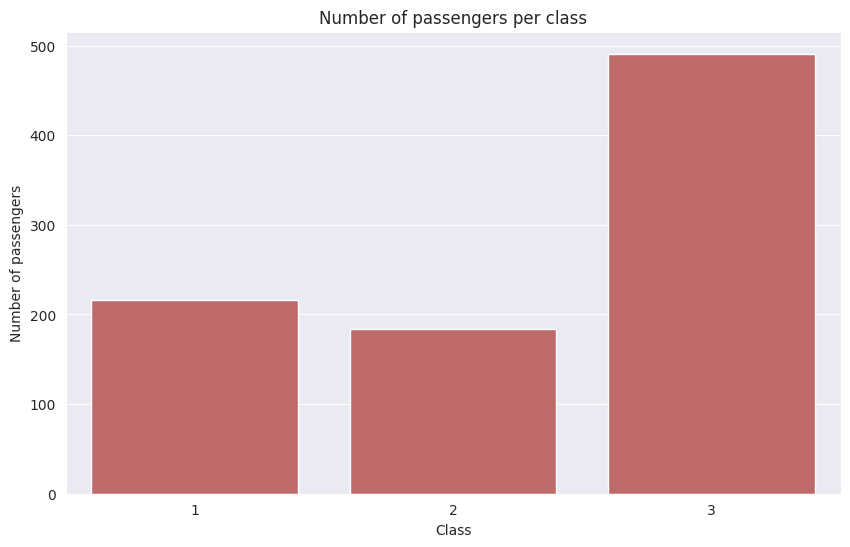

In [132]:
# Creating the variable I will need
passengers_per_class = df_titanic['Pclass'].value_counts()

# Creating a figure
fig = plt.figure(figsize=(10, 6))

# Creating the axes of the figure
sns.barplot(passengers_per_class, color = 'indianred')

# Choosing a style
sns.set_style('darkgrid')

# Adding titles for the axes and chart
plt.title('Number of passengers per class')
plt.xlabel('Class')
plt.ylabel('Number of passengers')


## ¿Cuál es la edad media de los pasajeros que sobrevivieron y de los que no?

In [141]:
# Creating a variable in order to calculate the mean of passengers who survived
average_age_survivors = df_titanic[df_titanic['Survived'] == 1]['Age'].mean()

# Rounding the average number
average_age_survivors = round(average_age_survivors)

# Printing the result
print("The average age of the passengers who survived is:", average_age_survivors)

# Creating a variable in order to calculate the mean of passengers who died
average_age_losses = df_titanic[df_titanic['Survived'] == 0]['Age'].mean()

# Rounding the average number
average_age_losses = round(average_age_losses)

# Printing the result
print("The average age of the passengers who died is:", average_age_losses)

The average age of the passengers who survived is: 28
The average age of the passengers who died is: 31


## ¿Cuál es la edad máxima de los pasajeros que sobrevivieron y de los que no?

In [147]:
# Creating a variable in order to calculate the max age of passengers who survived
max_age_survivors = df_titanic[df_titanic['Survived'] == 1]['Age'].max()

# Printing the result
print("The max age of the passengers who survived is:", average_age_survivors)

# Creating a variable in order to calculate the mean of passengers who died
max_age_losses = df_titanic[df_titanic['Survived'] == 0]['Age'].max()

# Printing the result
print("The max age of the passengers who died is:", average_age_losses)

The max age of the passengers who survived is: 80
The max age of the passengers who died is: 74.0


## ¿Qué porcentaje de menores de 18 sobrevivieron? ¿Y de mayores de 18?

In [152]:
# Creating two diffent variables. One for the survivors and another one for minors
survived = df_titanic['Survived'] == 1
minor = df_titanic['Age'] < 18

# Combining the two variables into one
survived_and_minor = survived & minor

# Calculating the percentage of minors who survived the accident
total_survived_minors = survived_and_minor.sum()

# Total number of minors
total_minors = minor.sum()

# Calculating the percentage
survived_and_minor_percentage = (total_survived_minors / total_minors) * 100

print("The percentage of minors who survived is:",survived_and_minor_percentage)

The percentage of minors who survived is: 53.98230088495575


In [156]:
# Creating two diffent variables. One for the survivors and another one for passengers of age
survived = df_titanic['Survived'] == 1
of_age = df_titanic['Age'] > 18

# Combining the two variables into one
survived_and_of_age = survived & of_age

# Calculating the percentage of passengers of age who survived the accident
total_survived_of_age = survived_and_of_age.sum()

# Total number of passengers of age
total_of_age = of_age.sum()

# Calculating the percentage
survived_and_of_age_percentage = (total_survived_of_age / total_of_age) * 100

print("The percentage of passengers of age who survived is:",survived_and_minor_percentage)

The percentage of passengers of age who survived is: 53.98230088495575
